In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import csv
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
%matplotlib inline
from keras.layers import Cropping2D
from PIL import Image

Using TensorFlow backend.


## CSV Data File processing

In [3]:
filepath  = "TrainingData/data/driving_log.csv"
imagePath  = "TrainingData/data/"

#### Setting the image size


In [ ]:
img_rows = 32
img_cols = 64

In [4]:
#reading the drivingLog File
def readLogFile(filepath,imagePath):
    
    drivingLog = []
    
    with open(filepath,'rt') as f:
        reader = csv.reader(f)
        for line in reader:
            drivingLog.append(line)
            
    #printing drivingLog first row as test
    print (drivingLog.pop(0))
    return drivingLog

In [5]:
def GenerateImagesLabels(features,labels,drivingLog,imagePath) :
    for i in range(len(drivingLog)):
        steering_center = float(drivingLog[i][3])
  
        correction_left = 0.2 # this is a parameter to tune
        correction_right = 0.2 # this is a parameter to tune
        steering_left = steering_center + correction_left
        steering_right = steering_center - correction_right
        img_center = np.asarray(cv2.resize(cv2.cvtColor(cv2.imread(imagePath + drivingLog[i][0]),cv2.COLOR_BGR2RGB),(img_cols,img_rows))  )
        img_left = np.asarray(cv2.resize(cv2.cvtColor(cv2.imread(imagePath + drivingLog[i][1]),cv2.COLOR_BGR2RGB),(img_cols,img_rows))  )
        img_right = np.asarray(cv2.resize(cv2.cvtColor(cv2.imread(imagePath + drivingLog[i][2]),cv2.COLOR_BGR2RGB),(img_cols,img_rows))  )
        
        # Loading Center Image
        features.append(img_center)
        labels.append(steering_center)
        
        # Loading Left Image
        features.append(img_left)
        labels.append(steering_left)
        
        # Loading Right Image
        features.append(img_right)
        labels.append(steering_right)
        
        
    print(len(data['features']))
        

In [6]:
def flipImages(features,labels):
    augmented_images, augmented_measurements = [] , []
    for feature, label in zip (features, labels):
        augmented_images.append(feature)
        augmented_measurements.append(label)
        augmented_images.append(cv2.flip(feature,1))
        augmented_measurements.append(label*-1.0)
    return augmented_images, augmented_measurements
        
        

In [7]:
drivingLog = readLogFile(filepath,imagePath)

data={}
data['features'] = []
data['labels'] = []

GenerateImagesLabels(data['features'],data['labels'],drivingLog,imagePath)

augmented_images, augmented_measurements = flipImages(data['features'],data['labels'])

print(len(augmented_images))

['IMG/center_2017_02_28_19_10_28_791.jpg', 'IMG/left_2017_02_28_19_10_28_791.jpg', 'IMG/right_2017_02_28_19_10_28_791.jpg', '0', '0', '0', '22.43326']
41460
82920


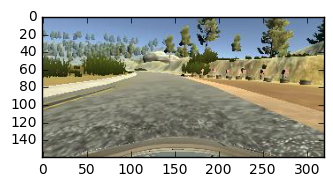

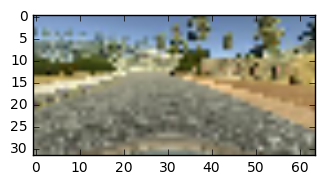

In [12]:
testPath = imagePath + (drivingLog[50][0]).strip()
imgplot = plt.imread(testPath)
plt.subplot(2,1,1)
plt.imshow(imgplot)
plt.show()

imgplot = cv2.resize(cv2.cvtColor(cv2.imread(testPath),cv2.COLOR_BGR2RGB),(img_cols,img_rows)) 

plt.subplot(2,1,1)
plt.imshow(imgplot)
plt.show()


In [8]:
X_train = np.array(augmented_images).astype('float32')
y_train = np.array(augmented_measurements).astype('float32')

print (X_train.shape)

(82920, 32, 64, 3)


In [9]:


model = Sequential([
    Lambda(lambda x: (x / 255.0) - 0.5,input_shape=(img_rows,img_cols,3)),
    Cropping2D(cropping=((13,4), (0,0)), input_shape=(img_rows,img_cols,3)),
    Conv2D(24, 5, 5,subsample=(2,2), activation='relu'),
    Conv2D(64, 3, 3, activation='relu'),
    Conv2D(64, 3, 3, activation='relu'),
    Dropout(0.5),
    
    Conv2D(128, 3, 3, border_mode='same', activation='relu'),

    Dropout(0.5),
    MaxPooling2D(),
    Flatten(),
    Dense(100),
    Dense(10),
    Dense(1)
        
])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 32, 64, 3)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 15, 64, 3)     0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 6, 30, 24)     1824        cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 4, 28, 64)     13888       convolution2d_1[0][0]            
___________________________________________________________________________________________

Train on 66336 samples, validate on 16584 samples
Epoch 1/4
66336/66336 [==============================] - 216s - loss: 0.0218 - val_loss: 0.0232
Epoch 2/4
66336/66336 [==============================] - 256s - loss: 0.0167 - val_loss: 0.0222
Epoch 3/4
66336/66336 [==============================] - 236s - loss: 0.0158 - val_loss: 0.0212
Epoch 4/4
66336/66336 [==============================] - 216s - loss: 0.0151 - val_loss: 0.0215
dict_keys(['loss', 'val_loss'])


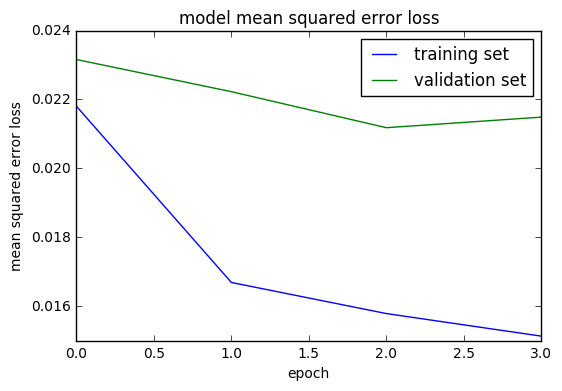

In [10]:
model.compile(loss='mse',optimizer='adam')
history_object = model.fit(X_train, y_train, validation_split=0.2,shuffle=True, nb_epoch=)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [11]:
print('Saving model...')

json = model.to_json()
model.save('save/model2.h5')
with open('save/model2.json', 'w') as f:
    f.write(json)
print("Model Saved.")

Saving model...
Model Saved.
